- Python Version : 3.11.9

In [124]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# EDA

## 정성 평가

In [8]:
df = pd.read_csv("dataset/Global YouTube Statistics.csv", encoding="latin1")

In [11]:
df.head(2)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [13]:
print(df.shape)
print(df.columns)

(995, 28)
Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [17]:
df['category'].value_counts()

Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: category, dtype: int64

## 결측치 확인

In [18]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [25]:
sample_indices_with_nan = df.isnull().sum(axis=1) >= 8
df_with_nan = df[sample_indices_with_nan]
print(len(df_with_nan))

123


In [29]:
df_with_nan.head(1).isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   1
Title                                      0
uploads                                    0
Country                                    1
Abbreviation                               1
channel_type                               0
video_views_rank                           0
country_rank                               1
channel_type_rank                          1
video_views_for_the_last_30_days           1
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               1
created_year                               0
created_month                              0
created_date                               0
Gross tert

## 데이터 이상치 확인

### boxplot

In [34]:
target_feature = 'lowest_monthly_earnings'

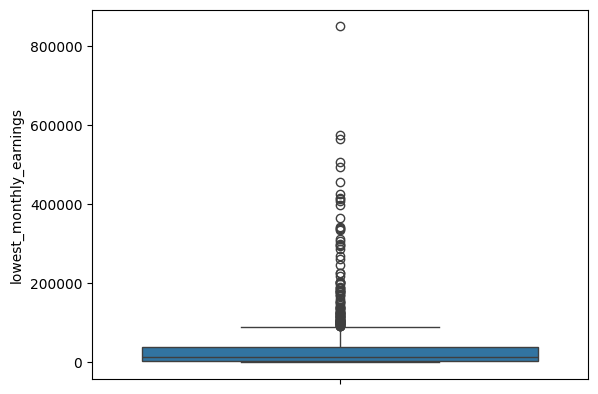

In [35]:
sns.boxplot(data=df, y=target_feature)
plt.show()

### histogram

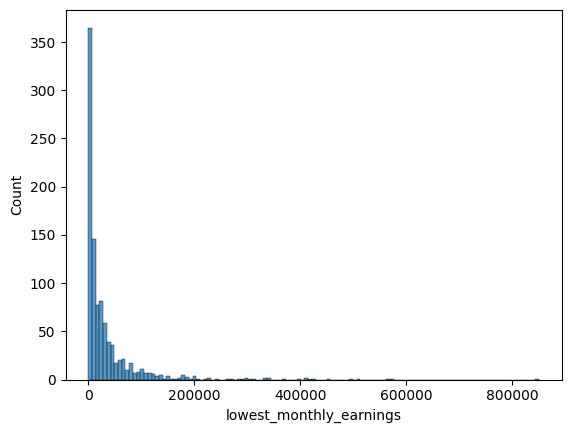

In [44]:
sns.histplot(data=df, x=target_feature)
plt.show()

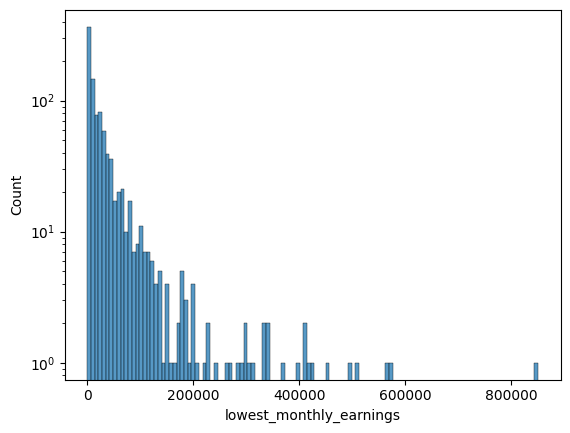

In [70]:
sns.histplot(data=df, x=target_feature) # log_scaler = (False, True)를 사용하면 그래프가 이상하게 그려지기 때문에 이렇게 작성
plt.yscale('log')
plt.show()

### barplot

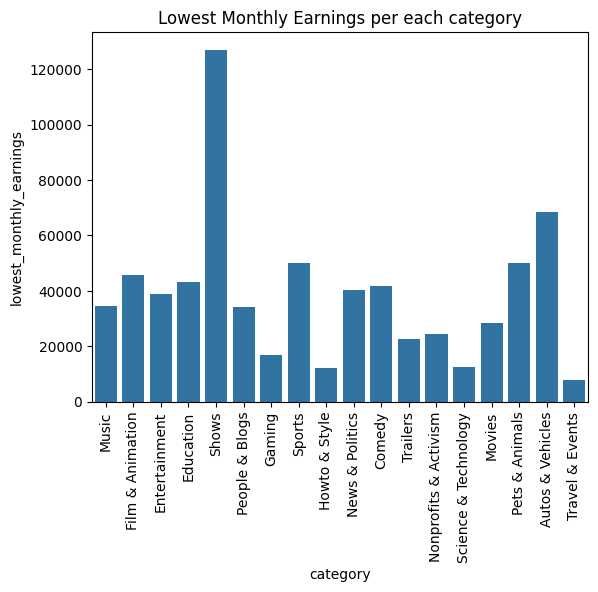

In [81]:
category_feature = 'category'
target_feature = 'lowest_monthly_earnings'

barplot = sns.barplot(data=df, x=category_feature, y=target_feature, color='C0', errorbar=None)
loc, labels = plt.xticks()
# 아래 2줄은 같이 써야 error 가 발생 x
barplot.set_xticks(range(len(labels)))
barplot.set_xticklabels(labels, rotation=90)

plt.title("Lowest Monthly Earnings per each category")
plt.show()

### 상관계수와 상관행렬

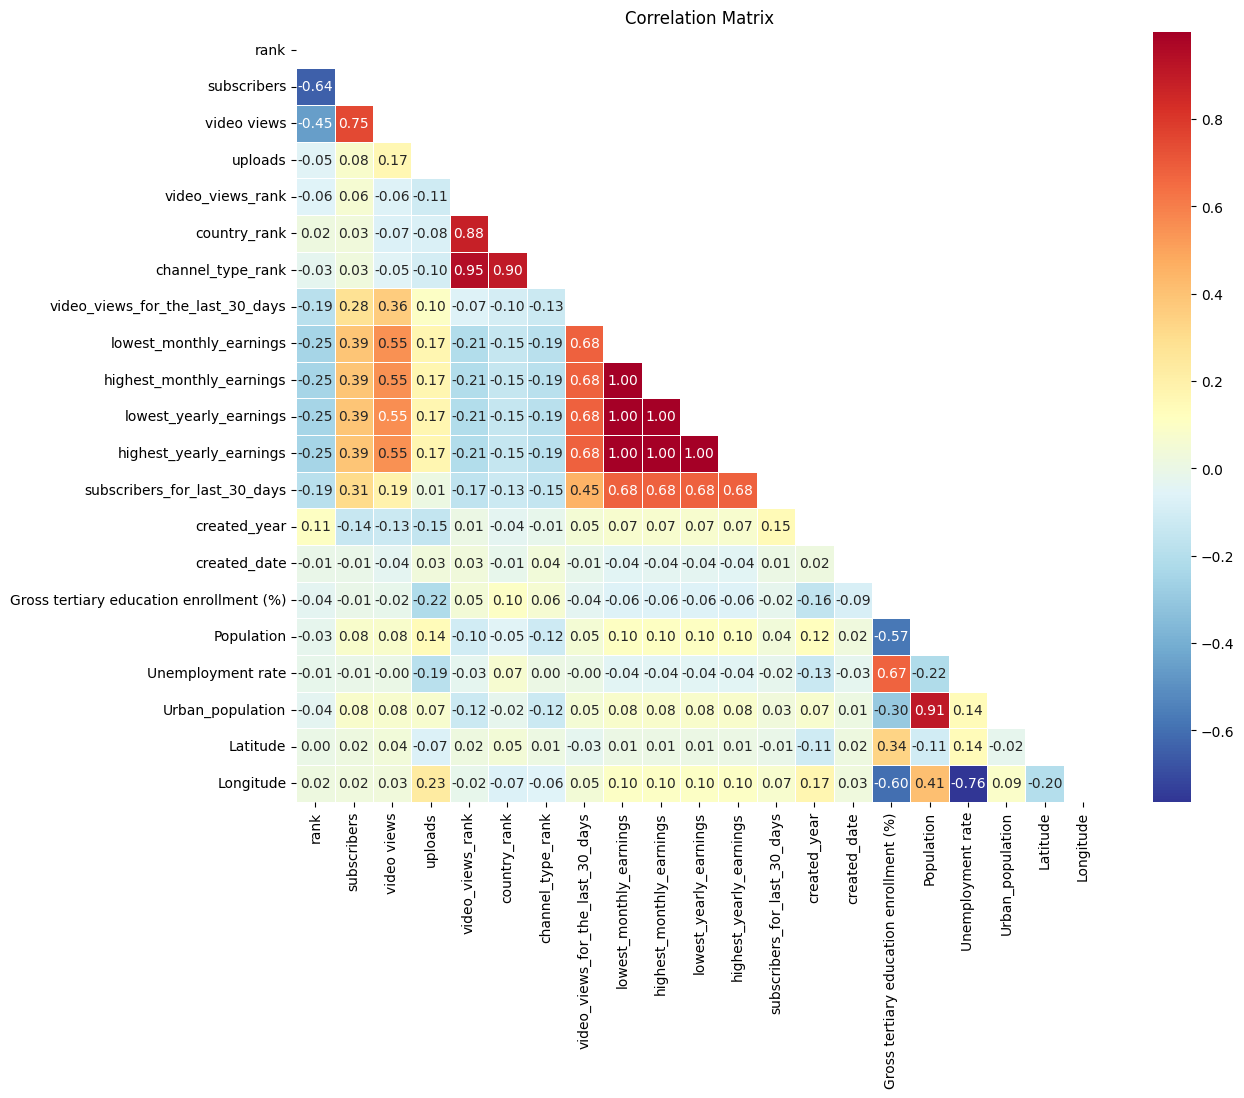

In [ ]:
corr = df.corr(numeric_only=True)
# mask : 히트맵에서 표시할 데이터를 선택적으로 숨기거나 강조할 때 사용
mask = np.ones_like(corr, dtype=bool)
mask = np.triu(mask) # triu : 행렬의 상삼각행렬 부분을 반환하며, 나머지 부분(하삼각행렬)을 False로 만든다

plt.figure(figsize=(13,10))
sns.heatmap(data=corr, annot=True, fmt='.2f', mask=mask, linewidths=.5, cmap="RdYlBu_r") # 여기서 mask역할은 True인 부분은 숨겨지고, False인 부분만 그려진다.
plt.title('Correlation Matrix')
plt.show()

## 결측치 처리

In [103]:
indices_to_keep = df.isnull().sum(axis=1) < 8

df_origin = df
df = df[indices_to_keep].copy()
print(len(df))

872


In [112]:
df.isnull().sum().sort_values(ascending=False)

subscribers_for_last_30_days               275
category                                    39
video_views_for_the_last_30_days            21
channel_type_rank                            8
channel_type                                 7
created_date                                 2
created_month                                2
created_year                                 2
Longitude                                    1
Latitude                                     1
Urban_population                             1
Unemployment rate                            1
Population                                   1
Gross tertiary education enrollment (%)      1
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
rank                                         0
highest_monthly_earnings                     0
Youtuber                                     0
country_rank                                 0
video_views_rank                             0
Abbreviation 

In [113]:
df['subscribers_for_last_30_days'].fillna(0, inplace=True)

In [114]:
df.dropna(axis=0, inplace=True)

In [115]:
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

## 데이터 분포 변환

In [118]:
target_feature = 'lowest_monthly_earnings'

df[f'log_{target_feature}'] = scale(np.log(df[target_feature]+1)) # np.log1p()
df[f'log_{target_feature}'].describe()

count    8.080000e+02
mean     2.638154e-16
std      1.000619e+00
min     -3.244308e+00
25%     -1.408595e-01
50%      2.255075e-01
75%      5.563207e-01
max      1.491941e+00
Name: log_lowest_monthly_earnings, dtype: float64

In [120]:
df[[target_feature, f'log_{target_feature}']].describe()

,lowest_monthly_earnings,log_lowest_monthly_earnings
count,808.000000,8.080000e+02
mean,38847.407178,2.638154e-16
std,66701.907137,1.000619e+00
min,0.000000,-3.244308e+00
25%,5950.000000,-1.408595e-01
50%,16600.000000,2.255075e-01
75%,41925.000000,5.563207e-01
max,576000.000000,1.491941e+00


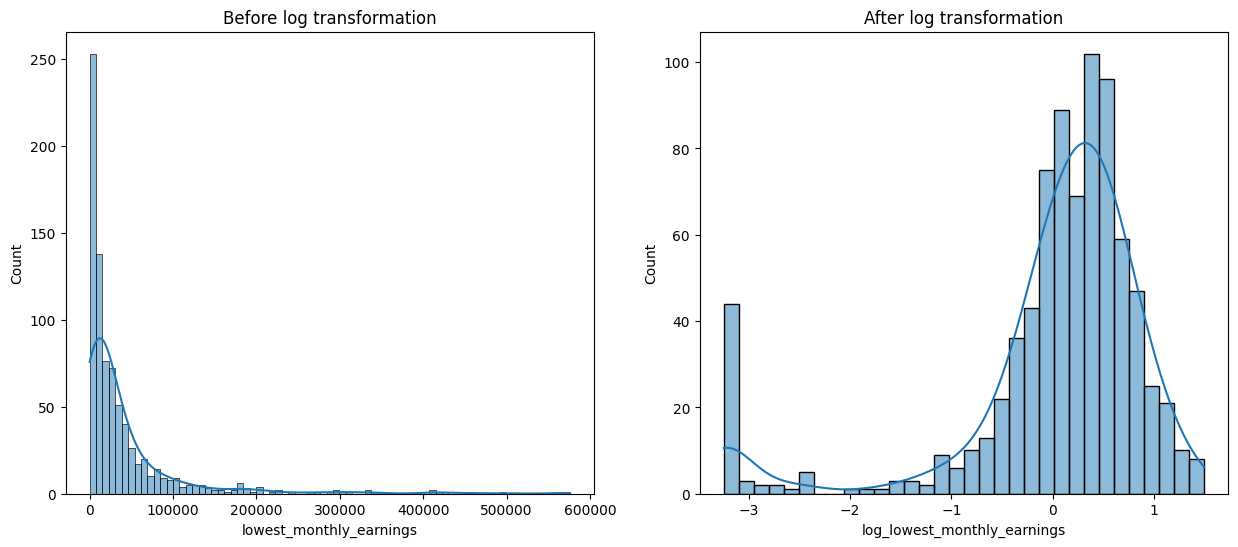

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(data=df, x=target_feature, kde=True, ax=ax[0])
ax[0].set_title('Before log transformation')
sns.histplot(data=df, x=f'log_{target_feature}', kde=True, ax=ax[1])
ax[1].set_title('After log transformation')
plt.show()

## 데이터 변환

### 표준화

- $ x_{scaled} = \frac{x - Min(x)}{Max(x) - Min(x)} $

In [126]:
target_feature = 'lowest_monthly_earnings'

ss = StandardScaler()
df[f'ss_{target_feature}'] = ss.fit_transform(df[[target_feature]])

In [138]:
print("Mean : ", df[target_feature].mean(), '->', df[f'ss_{target_feature}'].mean())
print("Standard deviation(표준편차) : ", df[target_feature].std(), '->', df[f'ss_{target_feature}'].std())

Mean :  38847.40717821782 -> -1.75876914792104e-17
Standard deviation(표준편차) :  66701.90713669512 -> 1.0006193868664488


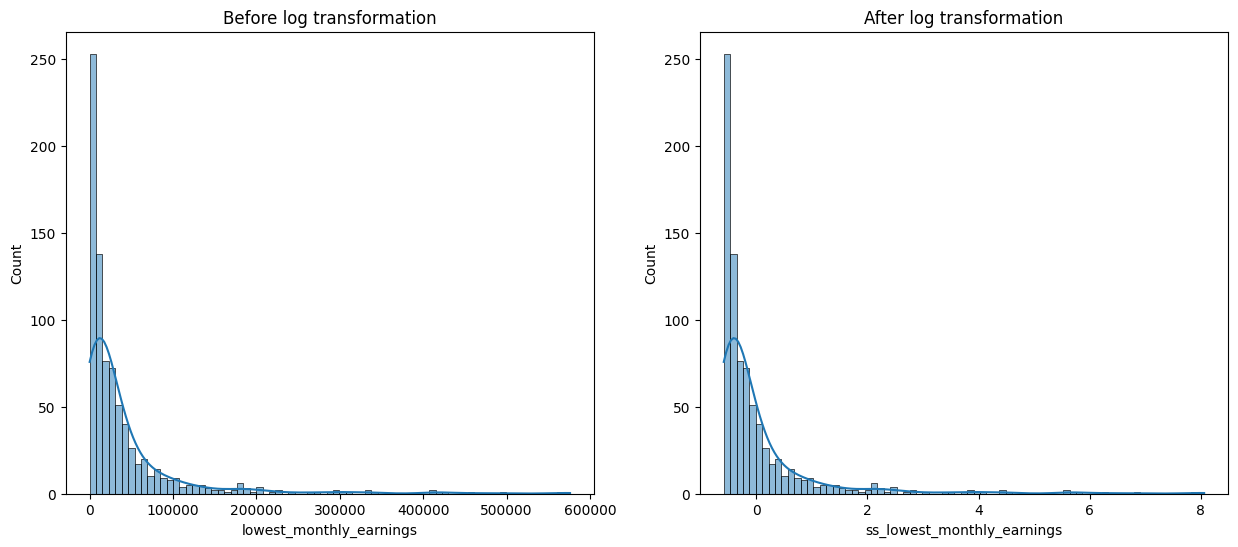

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(data=df, x=target_feature, kde=True, ax=ax[0])
ax[0].set_title('Before log transformation')
sns.histplot(data=df, x=f'ss_{target_feature}', kde=True, ax=ax[1])
ax[1].set_title('After log transformation')
plt.show()

### 정규화

- $ x_{scaled} = \frac{x - mean(x)}{Stdv(x)} $

In [140]:
target_feature = 'lowest_monthly_earnings'

mm = MinMaxScaler()
df[f'mm_{target_feature}'] = mm.fit_transform(df[[target_feature]])

In [141]:
print("Mean : ", df[target_feature].mean(), '->', df[f'mm_{target_feature}'].mean())
print("Standard deviation(표준편차) : ", df[target_feature].std(), '->', df[f'mm_{target_feature}'].std())

Mean :  38847.40717821782 -> 0.0674434152399615
Standard deviation(표준편차) :  66701.90713669512 -> 0.11580192211231805


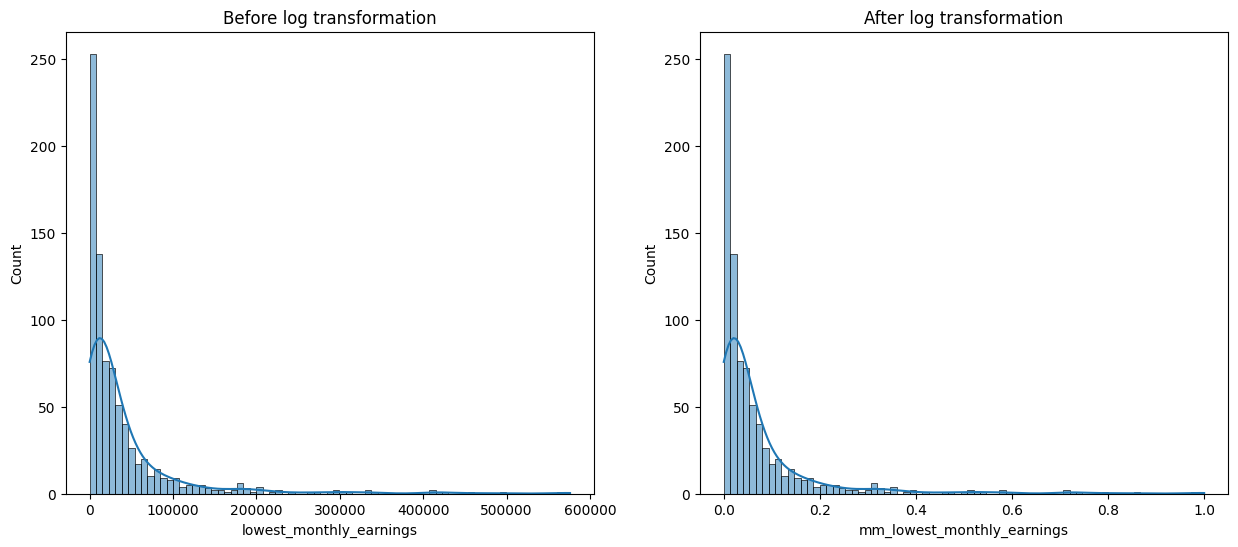

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(data=df, x=target_feature, kde=True, ax=ax[0])
ax[0].set_title('Before log transformation')
sns.histplot(data=df, x=f'mm_{target_feature}', kde=True, ax=ax[1])
ax[1].set_title('After log transformation')
plt.show()